<a href="https://colab.research.google.com/github/tj-mas04/Breast-cancer-detection---SVM/blob/main/breast_cancer_detection_using_SVM_and_Radiological_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/ML Project/kaggle.json ~/.kaggle/kaggle.json  #kaggle API

cp: target '/root/.kaggle/kaggle.json' is not a directory


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#run the codes below to import the dataset from kaggle using Kaggle API

In [5]:
!kaggle datasets download -d awsaf49/cbis-ddsm-breast-cancer-image-dataset

Dataset URL: https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset
License(s): CC-BY-SA-3.0
100% 4.95G/4.95G [03:54<00:00, 25.4MB/s]
100% 4.95G/4.95G [03:54<00:00, 22.7MB/s]


In [6]:
! unzip cbis-ddsm-breast-cancer-image-dataset  #run this code to unzip thhe dataset

Streaming output truncated to the last 5000 lines.
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295326067813319071803507885093865003464/1-076.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/1-265.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/2-266.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295397487412067903910787953980192002590/1-233.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/1-294.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/2-223.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/1-013.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/2-012.jpg  

**LINEAR REGRESSION**


In [7]:
import pandas as pd

In [31]:
data = pd.read_csv('/content/csv/mass_case_description_test_set.csv')
print(df.info())                                         #statistical analysys of data (2)

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               361 non-null    object
 1   breast_density           361 non-null    int64 
 2   left or right breast     361 non-null    object
 3   image view               361 non-null    object
 4   abnormality id           361 non-null    int64 
 5   abnormality type         361 non-null    object
 6   mass shape               361 non-null    object
 7   mass margins             361 non-null    object
 8   assessment               361 non-null    int64 
 9   pathology                361 non-null    object
 10  subtlety                 361 non-null    int64 
 11  image file path          361 non-null    object
 12  cropped image file path  361 non-null    object
 13  ROI mask file path       361 non-null    object
dtypes: int64(4), object(10)
memory usage: 42.3+ KB


In [32]:
# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
data['breast_density'] = data['breast_density'].astype('category').cat.codes
data['assessment'] = data['assessment'].astype('category').cat.codes

# Select features and target variable
X = data[['breast_density', 'assessment']]
y = data['subtlety']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.9374905742092362
R-squared: 0.0814946059820385


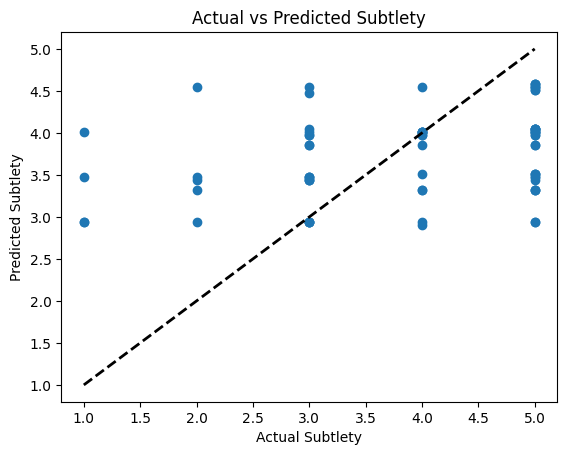

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Subtlety')
plt.ylabel('Predicted Subtlety')
plt.title('Actual vs Predicted Subtlety')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

**Bayesian logistic regression and Support Vector Machine (SVM)**

In [39]:
# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
data['breast_density'] = data['breast_density'].astype('category').cat.codes
data['assessment'] = data['assessment'].astype('category').cat.codes
data['mass shape'] = data['mass shape'].astype('category').cat.codes
data['pathology'] = data['pathology'].astype('category').cat.codes  # Target variable

# Select features and target variable
X = data[['breast_density', 'assessment', 'mass shape']]
y = data['pathology']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and fit the Bayesian logistic regression model
bayesian_logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
bayesian_logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_bayesian = bayesian_logistic_model.predict(X_test)

# Evaluate the model
print("Bayesian Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_bayesian))
print(classification_report(y_test, y_pred_bayesian))

Bayesian Logistic Regression Accuracy: 0.6301369863013698
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        42
           1       0.00      0.00      0.00         6
           2       0.57      0.64      0.60        25

    accuracy                           0.63        73
   macro avg       0.41      0.45      0.43        73
weighted avg       0.58      0.63      0.60        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from sklearn.svm import SVC

# Create and fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6301369863013698
              precision    recall  f1-score   support

           0       0.66      0.74      0.70        42
           1       0.00      0.00      0.00         6
           2       0.58      0.60      0.59        25

    accuracy                           0.63        73
   macro avg       0.41      0.45      0.43        73
weighted avg       0.58      0.63      0.60        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
